In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5133,6892-XPFPU,Male,1,Yes,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,2433.9,Yes
559,3716-UVSPD,Male,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.30,49.3,No
4892,8875-AKBYH,Male,1,No,No,20,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.35,1745.2,No
5386,6143-JQKEA,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),45.80,436.2,No
5263,9591-YVTEB,Male,1,No,No,55,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,44.85,2479.05,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.drop('customerID',axis='columns',inplace=True)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Drop customerID column as it is useless for the Model
   

In [17]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

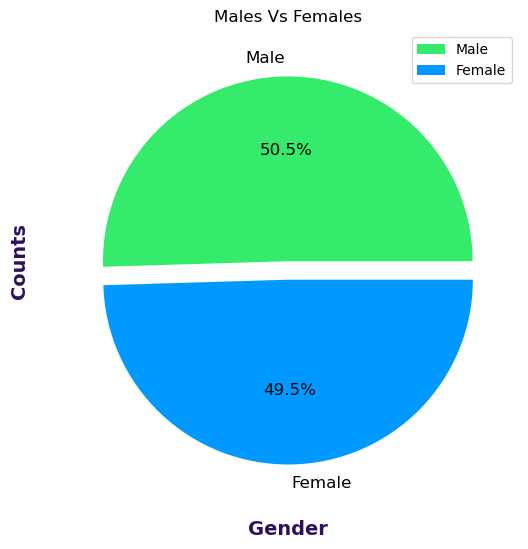

In [20]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'Male' to 0 and 'Female' to 1
 

In [31]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [34]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

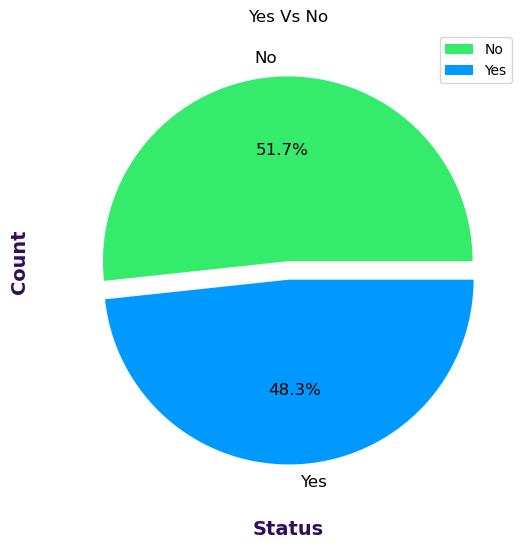

In [37]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["Partner"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes Vs No')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [42]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})

In [45]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

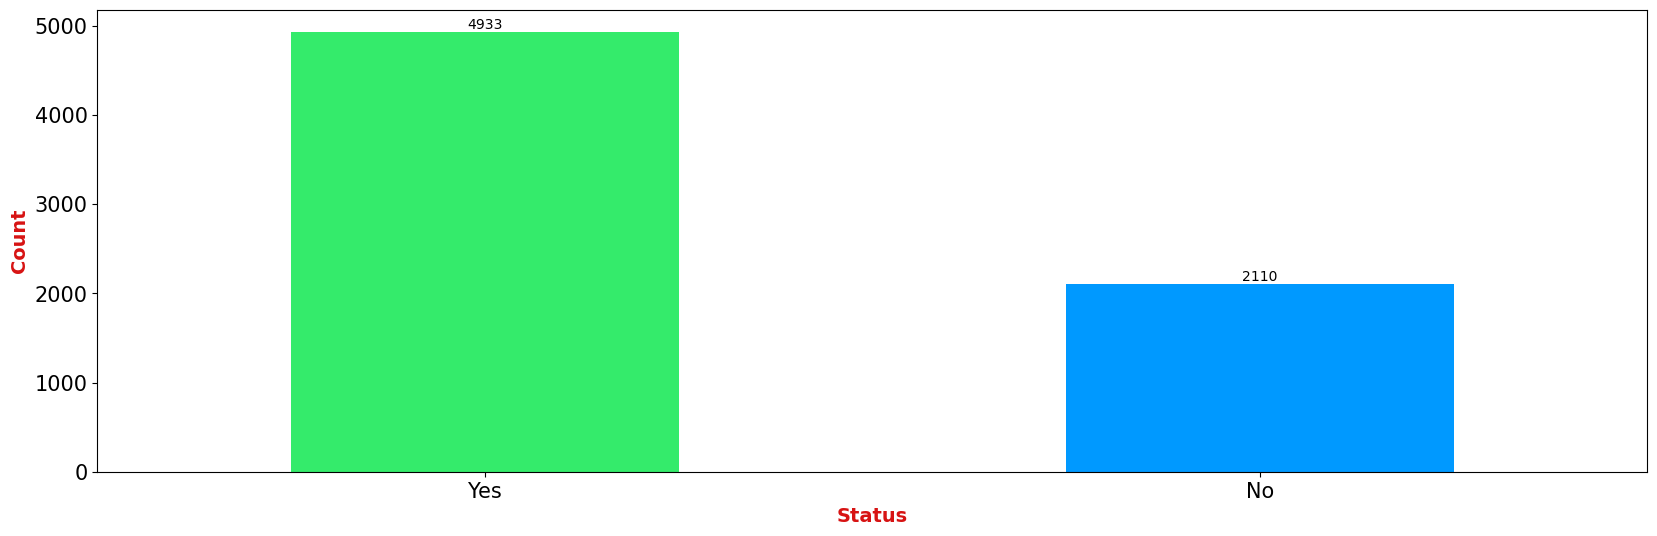

In [48]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["Dependents"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [61]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})

In [64]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

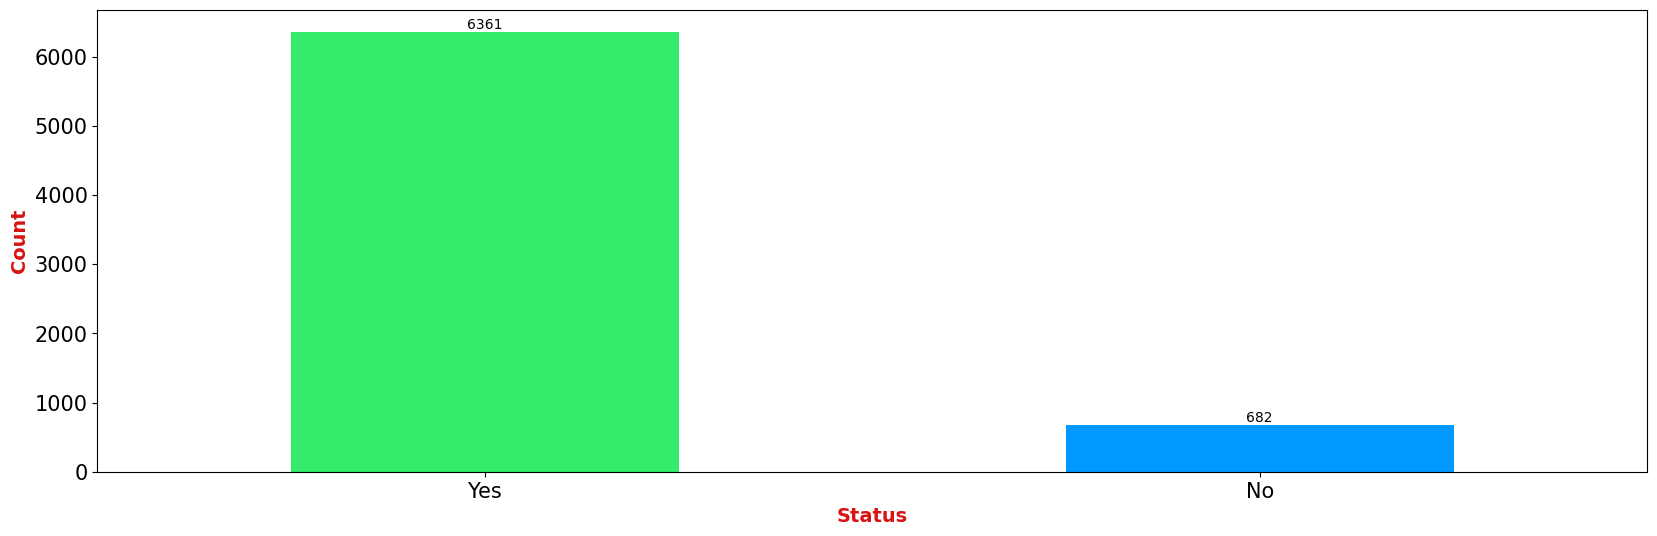

In [67]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["PhoneService"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [72]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

In [75]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

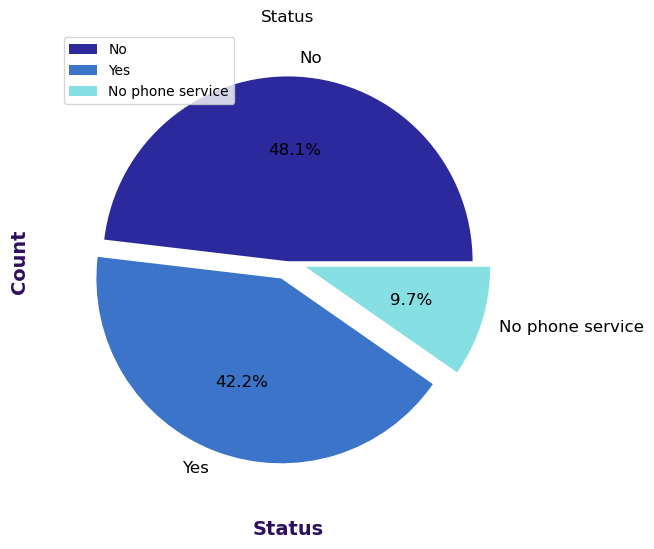

In [78]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = df["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
 Convert 'No phone service' to 0 &  Convert 'No' to 0 and 'Yes' to 1
 

In [83]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

df['MultipleLines'] = df['MultipleLines'].map(mapping_dict)

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [89]:
df.InternetService = le.fit_transform(df.InternetService)

In [92]:
df.Contract = le.fit_transform(df.Contract)

In [95]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

In [98]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4412,NaN,0,0,0,66,1,1,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,0,25.45,1699.15,No
6660,NaN,0,1,0,1,1,0,1,No,No,No,No,No,No,0,Yes,2,69.15,69.15,Yes
6917,NaN,0,1,0,72,1,1,1,Yes,Yes,No,No,No,No,2,Yes,0,84.05,6052.25,No
3608,NaN,0,0,0,39,1,1,1,No,No,No,No,No,No,0,No,2,75.25,3017.65,Yes


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
To avoid redundancy, One function to pre-process them all 
 

In [103]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [106]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Check the Null Values ...    
 

In [111]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [114]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,NaN,0,1,1,0,0,0,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,NaN,0,0,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,NaN,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,NaN,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,NaN,0,1,1,0,0,0,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,NaN,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,NaN,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,NaN,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,NaN,0,1,1,0,1,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,NaN,0,1,1,0,1,1,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [117]:
df.shape

(7043, 20)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Remove rows with space in TotalCharges    
 

In [122]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [125]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [128]:
df[cols_to_scale ].sample(5)

,tenure,MonthlyCharges,TotalCharges
5327,0.408451,0.014428,0.066980
6068,0.154930,0.261692,0.053289
6640,0.380282,0.323881,0.157858
6081,0.000000,0.313930,0.003577
1289,0.873239,0.502985,0.472254


In [131]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
gender,float64,7032,1.000000,0,0
SeniorCitizen,int64,0,0.000000,2,7032
Partner,int64,0,0.000000,2,7032
Dependents,int64,0,0.000000,2,7032
tenure,float64,0,0.000000,72,7032
PhoneService,int64,0,0.000000,2,7032
MultipleLines,int64,0,0.000000,2,7032
InternetService,int64,0,0.000000,3,7032
OnlineSecurity,int64,0,0.000000,2,7032
OnlineBackup,int64,0,0.000000,2,7032


In [134]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [137]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
120,NaN,0,1,1,0.774648,1,1,1,0,0,1,0,1,1,1,1,1,0.811443,0.634278
184,NaN,0,0,0,0.169014,1,0,1,0,1,1,0,0,0,0,1,2,0.606965,0.126108
5790,NaN,0,1,1,0.549296,0,0,0,0,1,0,0,1,1,0,1,2,0.324378,0.232835


In [140]:
y.sample(3)

6609    1
1671    0
5814    0
Name: Churn, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [145]:
X_train.shape

(5625, 19)

In [148]:
X_test.shape

(1407, 19)

In [151]:
import tensorflow as tf
from tensorflow import keras

In [154]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [157]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7425 - loss: nan
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7383 - loss: nan
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7404 - loss: nan
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7433 - loss: nan
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.7367 - loss: nan
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7442 - loss: nan
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7440 - loss: nan
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7349 - loss: nan
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7432 - loss: nan
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7419 - loss: nan
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7417 - loss: nan
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/s

In [160]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.7260 - loss: nan


[nan, 0.7100213170051575]

In [163]:
from sklearn.metrics import confusion_matrix , classification_report

In [166]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       999
           1       0.00      0.00      0.00       408

    accuracy                           0.71      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.50      0.71      0.59      1407



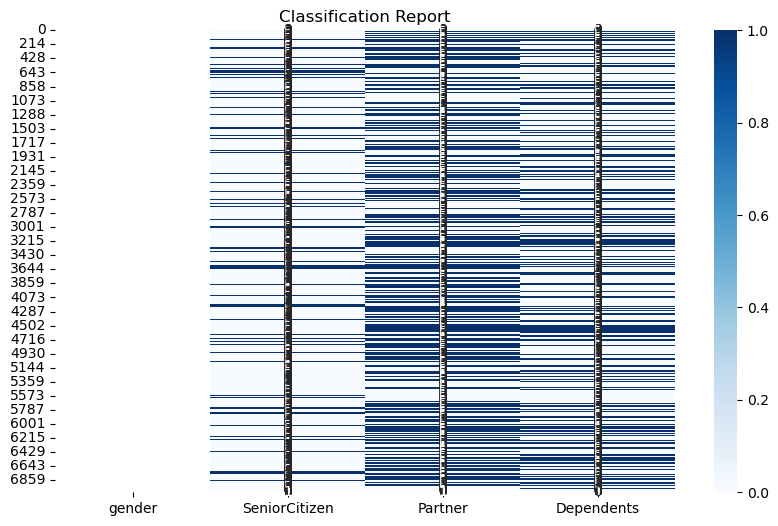

In [172]:
report = classification_report(y_test, y_pred, output_dict=True)
rep = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :4], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [182]:
# Extract metrics for each class
classes = [str(key) for key in range(len(report) - 3)]  # Extract class labels
precision = [report[key]['precision'] for key in classes]
recall = [report[key]['recall'] for key in classes]
f1_score = [report[key]['f1-score'] for key in classes]

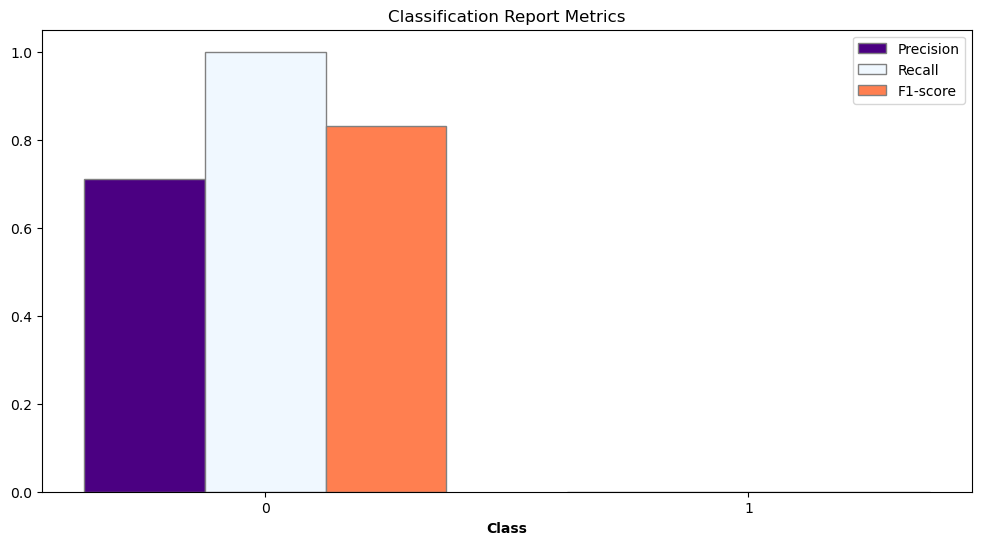

In [184]:
# Plotting the metrics using a bar chart
plt.figure(figsize=(12, 6))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='#4b0082', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='#f0f8ff', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='#ff7f50', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.legend()
plt.title("Classification Report Metrics")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

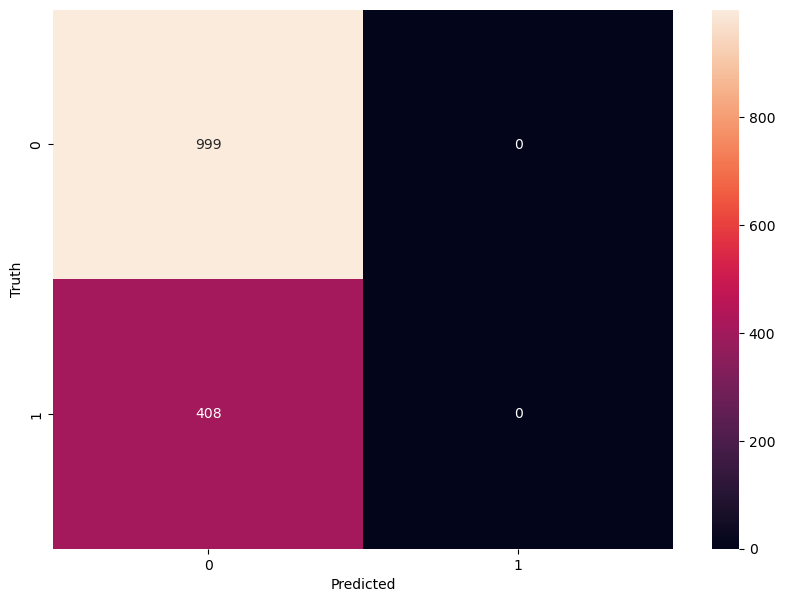

In [187]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')